In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("train.csv")

In [56]:
df.isnull().sum()

PRODUCT_ID               0
TITLE                   12
BULLET_POINTS       837364
DESCRIPTION        1157381
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64

In [57]:
df

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000
...,...,...,...,...,...,...
2249693,2422167,Nike Women's As W Ny Df Swsh Hn Kh Bra (CZ7610...,Material : Polyester,NaN,3009,1181.100000
2249694,2766635,"(3PCS) Goose Game Cute Cartoon Enamel Pins, Fu...",[❤ [Inspiration] Inspired by the Untitled Goos...,<p><b>[Brand]: </b>XVIEONR</p> <p><br></p> <p>...,3413,125.984252
2249695,1987786,Kangroo Sweep Movement Printed Wooden Wall Clo...,"[Dial size: 12 inches in diameter,Big, clear r...",Wall Clocks Are Very Attractive In Looks And E...,1574,1200.000000
2249696,1165754,Electro Voice EKX-BRKT15 | Wall Mount Bracket ...,NaN,NaN,592,2900.000000


In [58]:
nl = df['BULLET_POINTS'].iloc[:50]

In [59]:
tt = df['TITLE'].iloc[:50]
tt.unique()

array(['ArtzFolio Tulip Flowers Blackout Curtain for Door, Window & Room | Eyelets & Tie Back | Canvas Fabric | Width 4.5feet (54inch) Height 5 feet (60 inch); Set of 2 PCS',
       "Marks & Spencer Girls' Pyjama Sets T86_2561C_Navy Mix_9-10Y",
       'PRIKNIK Horn Red Electric Air Horn Compressor Interior Dual Tone Trumpet Loud Compatible with SX4',
       "ALISHAH Women's Cotton Ankle Length Leggings Combo of 2, Plus 12 Colors_L",
       'The United Empire Loyalists: A Chronicle of the Great Migration',
       'HINS Metal Bucket Shape Plant Pot for Indoor & Outdoor Gardening (Red, Medium) Plant Stands for Indoor Balcony I Plant Bench I Plant Stands I Pot Stand Single I Potted Plant Stand I Big Pots I Metal',
       'Ungifted: My Life and Journey',
       'Delavala Self Adhesive Kitchen Backsplash Wallpaper, Oil Proof Aluminum Foil Kitchen Sticker (Sliver 5(Mtr))',
       "PUMA Cali Sport Clean Women's Sneakers White Leather (37540701)",
       'Hexwell Essential oil for Home Fragranc

In [60]:
ds = df['DESCRIPTION'].iloc[:50]
ds

0                                                   NaN
1                                                   NaN
2     Specifications: Color: Red, Material: Aluminiu...
3     AISHAH Women's Lycra Cotton Ankel Leggings. Br...
4                                                   NaN
5     HINS Brings you the most Elegant Looking Pot w...
6                                                   NaN
7     <p><strong>Aluminum Foil Stickers-good kitchen...
8                                                   NaN
9     Transform your home, workplace or hotel room i...
10    3NH Glasses Goggles Anti Fog Antis Windproof A...
11                                                  NaN
12                                                  NaN
13                                                  NaN
14    Segovia bottle consists of stainless steel whi...
15                                                  NaN
16                                                  NaN
17                                              

In [61]:
df.dtypes

PRODUCT_ID           int64
TITLE               object
BULLET_POINTS       object
DESCRIPTION         object
PRODUCT_TYPE_ID      int64
PRODUCT_LENGTH     float64
dtype: object

In [11]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vedant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vedant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
# Load example data
cd = pd.DataFrame({
    'product_title': ['Product A with HTML tags', 'Product B with HTML tags'],
    'description': ['Product A description with HTML tags and emojis 😊.',
                    'Product B description with HTML tags and emojis 😊.'],
    'length': [10, 15]
})

# Define a function to preprocess text
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Lowercase text
    text = text.lower()
    
    # Tokenize text
    words = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Stem words
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Convert text to numerical representation
    tfidf = TfidfVectorizer(min_df=1)
    text = tfidf.fit_transform(words).toarray()
    
    return text

# Apply the preprocess_text function to the product_title and description columns
cd['product_title_processed'] = cd['product_title'].apply(preprocess_text)
cd['description_processed'] = cd['description'].apply(preprocess_text)

# Print the preprocessed dataframe
print(cd)

              product_title  \
0  Product A with HTML tags   
1  Product B with HTML tags   

                                         description  length  \
0  Product A description with HTML tags and emoji...      10   
1  Product B description with HTML tags and emoji...      15   

                             product_title_processed  \
0  [[0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, ...   
1  [[0.0, 1.0, 0.0], [0.0, 0.0, 0.0], [1.0, 0.0, ...   

                               description_processed  
0  [[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0....  
1  [[0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0....  


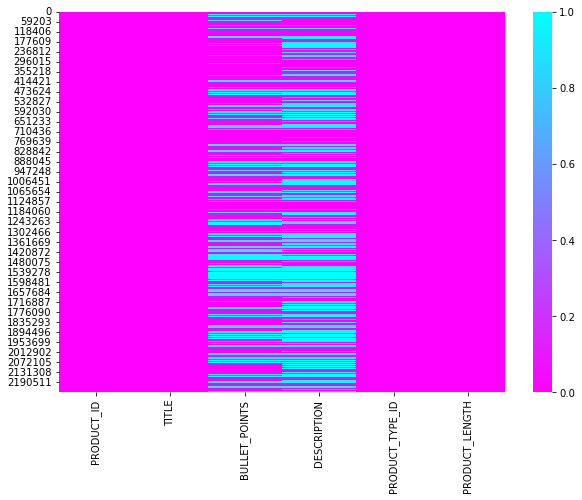

PRODUCT_ID               0
TITLE                   12
BULLET_POINTS       837364
DESCRIPTION        1157381
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64

In [64]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()
df.isnull().sum()

In [53]:
df=df.iloc[:3000,:]

In [44]:
# df['TITLE'].fillna('TITLE NOT AVAILABLE',inplace = True)
df.loc[df['TITLE'].isnull(), 'TITLE'] = 'TITLE NOT AVAILABLE'

In [45]:
df.loc[df['DESCRIPTION'].isnull(), 'DESCRIPTION'] = 'DESCRIPTION NOT AVAILABLE'

In [46]:
df['DESCRIPTION']

0                             DESCRIPTION NOT AVAILABLE
1                             DESCRIPTION NOT AVAILABLE
2     Specifications: Color: Red, Material: Aluminiu...
3     AISHAH Women's Lycra Cotton Ankel Leggings. Br...
4                             DESCRIPTION NOT AVAILABLE
5     HINS Brings you the most Elegant Looking Pot w...
6                             DESCRIPTION NOT AVAILABLE
7     <p><strong>Aluminum Foil Stickers-good kitchen...
8                             DESCRIPTION NOT AVAILABLE
9     Transform your home, workplace or hotel room i...
10    3NH Glasses Goggles Anti Fog Antis Windproof A...
11                            DESCRIPTION NOT AVAILABLE
12                            DESCRIPTION NOT AVAILABLE
13                            DESCRIPTION NOT AVAILABLE
14    Segovia bottle consists of stainless steel whi...
15                            DESCRIPTION NOT AVAILABLE
16                            DESCRIPTION NOT AVAILABLE
17                            DESCRIPTION NOT AV

In [47]:
df['BULLET_POINTS'].fillna('No Bullet points',inplace = True)

In [48]:
df.isnull().sum()

PRODUCT_ID         0
TITLE              0
BULLET_POINTS      0
DESCRIPTION        0
PRODUCT_TYPE_ID    0
PRODUCT_LENGTH     0
dtype: int64

In [51]:
preprocessed_data = pd.DataFrame()

# preprocessed_data['title_processed'] = df['TITLE'].apply(preprocess_text)
preprocessed_data['description_processed'] = df['DESCRIPTION'].apply(preprocess_text)

# Print the preprocessed dataframe
print(preprocessed_data.head())


                               description_processed
0                           [[0.0, 1.0], [1.0, 0.0]]
1                           [[0.0, 1.0], [1.0, 0.0]]
2  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...
4                           [[0.0, 1.0], [1.0, 0.0]]
